<a href="https://colab.research.google.com/github/Jose-Gabriel-Rodriguez/MachineLearning/blob/main/Unidad3/Pr%C3%A1ctica_4_Arboles_de_Decision_Lending_Club.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://github.com/JoseGabriel-ITD/Probabilidad-y-Estadistica/blob/main/Cintilla2004.png?raw=true)

# **Machine Learning y Deep Learning**

## Unidad 3

### Practica 4: **Árboles de Decisión Lending Club**

### Facilitador: *Dr. José Gabriel Rodríguez Rivas*

### Alumno:  _____________


## **Clasificador de Árboles de decision**

Probaremos el método de clasificación de árboles de decision.
- El primero con hpyerparameters por defecto
- El segundo especificando balanceo de clases
- El tercero con balanceo de clases y max-depth
- Finalmente, buscaremos los **parametros optimos usando GridSearch** y entrenaremos otro modelo con esos parametros





### **Carga de librerías y archivo de datos**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Importamos librerias necesarias para Árboles de decisión
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve

In [2]:
prestamos_df = pd.read_csv('prestamos_ok.csv')
prestamos_df.head()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,issue_year,repaid,loan_term_year,purpose_code,home_ownership_code,grade_code,addr_state_code
0,0,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,...,Cash,N,NaN,2011,1,3,11,4,2,2
1,1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,Cash,N,NaN,2011,1,3,9,4,2,0
2,2,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,...,Cash,N,NaN,2011,1,3,0,4,4,0
3,3,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,...,Cash,N,NaN,2011,0,5,11,3,5,0
4,4,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,...,Cash,N,NaN,2011,0,5,9,4,1,5


## **Selección de Variables predictoras**   

**Para la seleccion de caracteristicas que se utilizarán en el modelo, la mejor opción es comprender los datos, y comprender las reglas del negocio**

Selecionamos las siguientes variables predictoras (columnas)

- **funded_amnt**             ( monto financiado)  La cantidad total comprometida con ese préstamo en ese momento.
- **loan_term_year**          ( Plazo del credito )
- **int_rate**                ( taza de interes )
- **grade_code**              ( codigo de la calificacion del crédito )
- **purpose_code**            ( codigo del proposito)
- **addr_state_code**         ( codigo de la ciudad)
- **home_ownership_code**     ( codigo situacion casa)
- **annual_inc**              ( ingresos anuales)
- **dti**                     ( Una relación calculada utilizando los pagos de deuda mensuales totales del prestatario )
- **revol_util**              ( cantidad de crédito que el prestatario está utilizando en relación con todo el crédito  )
- **pub_rec_bankruptcies**    ( Número de quiebras de registros públicos )

**Variable dependiente (variable a predecir)**
* **la etiqueta `repaid` será la elegida para el modelo de clasificación**.

**Otros aspectos a considerar**

- Solo las **características que están disponibles antes de que se inicie el préstamo pueden usarse en la clasificación**.
- Las características como **recoveries** (recuperaciones o cargo posterior a la recuperación bruta), **total_rec_prncp** (Principal recibido a la fecha), que solo están disponibles después de que se cierra el préstamo, no deben incluirse en las funciones de entrenamiento.
- Si la clasificación logra una tasa de precisión cercana al 100%, es probable que incluya características que solo estarán disponibles después de que se cierre el préstamo.



In [3]:
X = prestamos_df[['funded_amnt', "int_rate", "grade_code", 'purpose_code', 'addr_state_code',
                 'home_ownership_code', 'annual_inc', 'dti', 'revol_util',
                 'pub_rec_bankruptcies']]

# Variable objetivo o variable a predecir
y = prestamos_df["repaid"]

### **Dividir dataset en conjunto de entrenamiento y prueba**

In [4]:
# Dividimos el dataFrame
# stratify es para que mantenga la misma proporción de clases en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size= 0.4, stratify=y )

In [5]:
# verificamos la cantidad de registros asignados al dataframe de entrenamiento
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11944, 10), (7964, 10), (11944,), (7964,))

### **Modelo 1 con valores por defecto**

In [6]:
# Crear el modelo de árbol de clasificación
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Entrenar el modelo
tree_model.fit(X_train, y_train)

# Precisión del modelo en la fase de entrenamiento
print("Precision del clasificador en fase de entrenamiento", tree_model.score(X_train, y_train) )

Precision del clasificador en fase de entrenamiento 0.853901540522438


### **Fase de prueba y evaluación del modelo**

In [7]:
# Hacer predicciones con los datos de prueba
y_pred = tree_model.predict(X_test)

# Crear un informe de texto que muestre las principales métricas de clasificación.
print("\nReporte de métricas del clasificador de Arboles de Decisión: \n",
      classification_report(y_test, y_pred, target_names=["No Pagado", "Pagado"]))

print(f'\nMatriz Confusion de Arboles de Decisión:\n', confusion_matrix(y_test, y_pred ))


Reporte de métricas del clasificador de Arboles de Decisión: 
               precision    recall  f1-score   support

   No Pagado       0.33      0.02      0.04      1177
      Pagado       0.85      0.99      0.92      6787

    accuracy                           0.85      7964
   macro avg       0.59      0.51      0.48      7964
weighted avg       0.78      0.85      0.79      7964


Matriz Confusion de Arboles de Decisión:
 [[  24 1153]
 [  48 6739]]


### **Interpretación**

| **Clase real / predicha** | **Predijo No Pagado (0)** | **Predijo Pagado (1)** | **Total real** |
| ------------------------- | ------------------------: | ---------------------: | -------------: |
| **No Pagado (0)**         |             **24** (VP) |        **1153** (FN) |           1177 |
| **Pagado (1)**            |             **48** (FP) |        **6739** (VN) |           6787 |
| **Total predicho**        |                        72 |                   7892 |           7964 |  


**Mas a detalle**  

| Tipo                          | Qué significa                                             | En tu modelo | Interpretación                                                     |
| ----------------------------- | --------------------------------------------------------- | ------------ | ------------------------------------------------------------------ |
| **VP (Verdaderos Positivos)** | Casos **reales “No Pagado”** correctamente detectados.    | 24           | Detectó solo 24 impagos correctamente. Muy bajo.                   |
| **FN (Falsos Negativos)**     | Casos reales “No Pagado” pero el modelo predijo “Pagado”. | 1153         | El modelo **no detectó 1153 impagos**, los confundió con pagos.    |
| **FP (Falsos Positivos)**     | Casos reales “Pagado” pero el modelo predijo “No Pagado”. | 48           | Solo 48 créditos buenos fueron marcados erróneamente como impagos. |
| **VN (Verdaderos Negativos)** | Casos reales “Pagado” correctamente identificados.        | 6739         | Clasificó correctamente la mayoría de los créditos pagados.        |  


**Como se hacen los calculos conn la matriz:**
* **Precisión (No Pagado)** = VP / (VP + FP) = 24 / (24 + 48) = 0.33
→ De todas las veces que el modelo predijo “No Pagado”, solo el 33% eran realmente impagos.
* **Recall (No Pagado)** = VP / (VP + FN) = 24 / (24 + 1153) = 0.02
→ De todos los impagos reales, solo el 2% fueron detectados.
* **Precisión (Pagado)** = VN / (VN + FN) = 6739 / (6739 + 1153) = 0.85
* **Recall (Pagado)** = VN / (VN + FP) = 6739 / (6739 + 48) = 0.99



## **Modelo 2 con Balanceo de clases**


In [8]:
# Crear modelo con balanceo de clases
tree_model2 = DecisionTreeClassifier(criterion='gini', max_depth=5, class_weight='balanced', random_state=42, )

# Entrenar el modelo
tree_model2.fit(X_train, y_train)

# Realizar fase de pruena
y_pred2 = tree_model2.predict(X_test)

# Evaluar el modelo
print("\nReporte de métricas del clasificador de Arboles de Decisión: \n",
      classification_report(y_test, y_pred2, target_names=["No Pagado", "Pagado"]))

print("\n Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred2))


Reporte de métricas del clasificador de Arboles de Decisión: 
               precision    recall  f1-score   support

   No Pagado       0.21      0.62      0.32      1177
      Pagado       0.90      0.61      0.73      6787

    accuracy                           0.61      7964
   macro avg       0.56      0.61      0.52      7964
weighted avg       0.80      0.61      0.67      7964


 Matriz de Confusión:
[[ 727  450]
 [2667 4120]]


### **Interpretacion**

* Detecta una buena proporción de NO pagados (recall=0.62) con un desempeño general aceptable (accuracy=0.61).
* Casi de manera identica con un recall de 0.61  identifica los creditos pagados.
* Desempeño general de 0.61 vs 0.85 del anterior.
* Mantiene equilibrio entre ambas clases.



## **Modelo 3 con Balanceo de clases y max_depth**

In [9]:
# Crear modelo con balanceo de clases y max_depth (profundidad del árbol)
tree_model3 = DecisionTreeClassifier(criterion='gini', max_depth=7, class_weight='balanced', random_state=42, )

# Entrenar el modelo
tree_model3.fit(X_train, y_train)

# Realizar fase de prueba
y_pred3 = tree_model3.predict(X_test)

# Evaluar el modelo de prueba
print("\nReporte de métricas del clasificador de Arboles de Decisión: \n",
      classification_report(y_test, y_pred3, target_names=["No Pagado", "Pagado"]))

print("\n Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred3))


Reporte de métricas del clasificador de Arboles de Decisión: 
               precision    recall  f1-score   support

   No Pagado       0.21      0.67      0.32      1177
      Pagado       0.91      0.55      0.68      6787

    accuracy                           0.57      7964
   macro avg       0.56      0.61      0.50      7964
weighted avg       0.80      0.57      0.63      7964


 Matriz de Confusión:
[[ 792  385]
 [3058 3729]]


### **Interpretacion**
  
* Aumenta la detección de créditos que no se pagaron (recall=0.67), pero baja la precisión general (accuracy=0.57). Tiende a clasificar más casos como “No Pagado”.
* Disminuye aun mas la deteccion de creditos pagados

## **Visualizar árbol de decision**

In [10]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

model_columns = ['funded_amnt', "int_rate", "grade_code", 'purpose_code', 'addr_state_code',
                 'home_ownership_code', 'annual_inc', 'dti', 'revol_util',
                 'pub_rec_bankruptcies']

# Visualizar el árbol en texto
print(export_text(tree_model3, feature_names=model_columns))



|--- int_rate <= 11.61
|   |--- int_rate <= 8.43
|   |   |--- annual_inc <= 58272.00
|   |   |   |--- revol_util <= 20.45
|   |   |   |   |--- revol_util <= 5.35
|   |   |   |   |   |--- annual_inc <= 34500.00
|   |   |   |   |   |   |--- annual_inc <= 26296.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- annual_inc >  26296.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- annual_inc >  34500.00
|   |   |   |   |   |   |--- annual_inc <= 54900.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- annual_inc >  54900.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- revol_util >  5.35
|   |   |   |   |   |--- dti <= 11.82
|   |   |   |   |   |   |--- dti <= 11.63
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- dti >  11.63
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- dti >  11.82
|   |   |   |   |   |   |--- funded_amnt <= 4150.00
|   |   |   |   |   |   |   |-

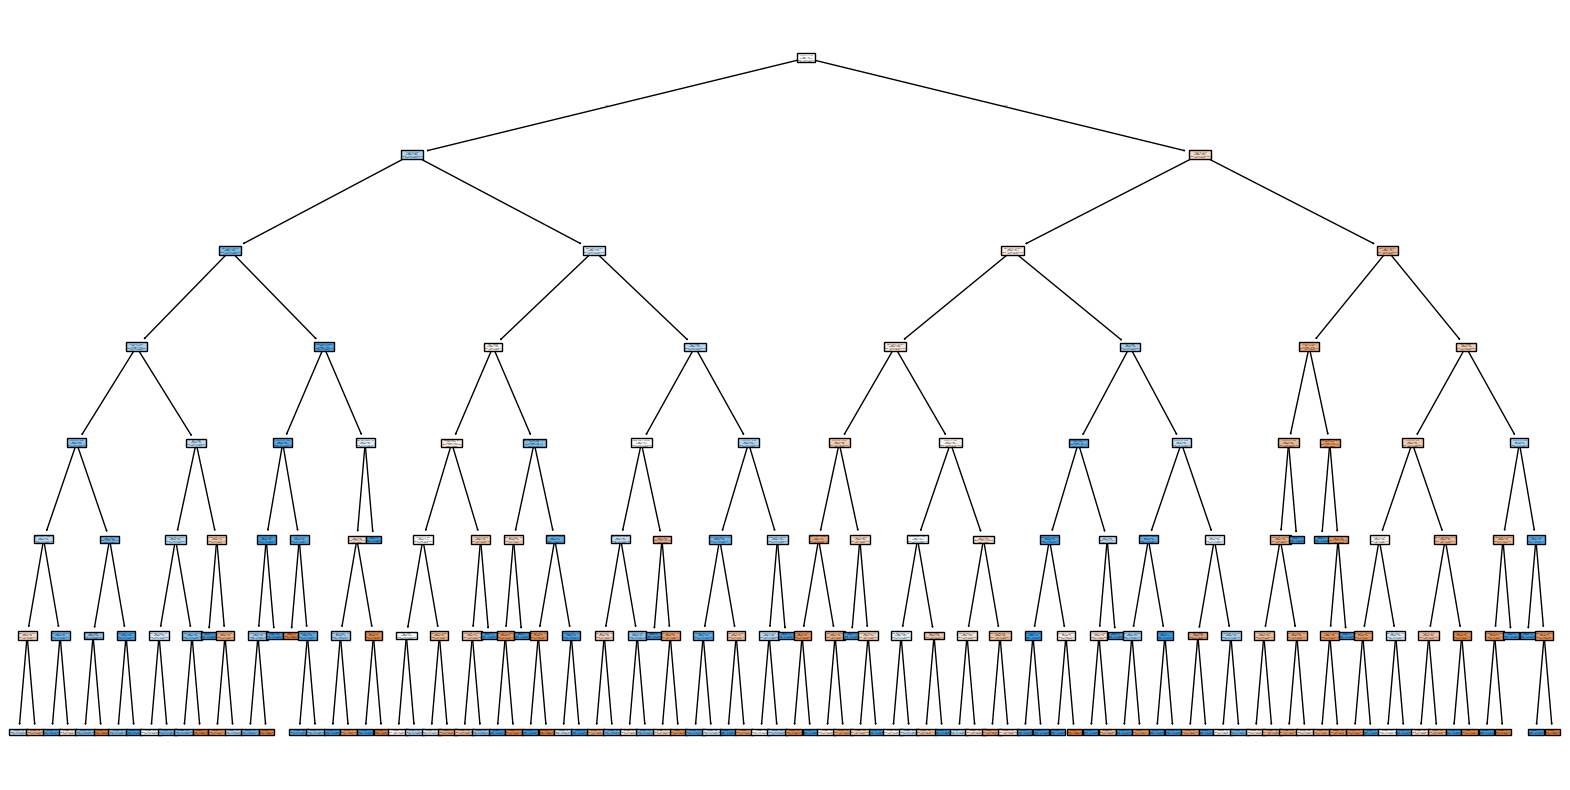

In [11]:
# Graficar el árbol
plt.figure(figsize=(20, 10))
plot_tree(tree_model3, feature_names=model_columns, class_names=['Pagado', 'No Pagado'], filled=True)
plt.show()

## **Visualizar la importancia de las características**  


In [13]:
importancia_caracteristicas = pd.DataFrame({
    'Caracteristica': model_columns,
    'Importancia': tree_model3.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("\nImportancia de las características:")
print(importancia_caracteristicas)


Importancia de las características:
         Caracteristica  Importancia
1              int_rate     0.470464
6            annual_inc     0.176671
8            revol_util     0.112103
7                   dti     0.069890
0           funded_amnt     0.064784
4       addr_state_code     0.042128
3          purpose_code     0.041094
5   home_ownership_code     0.012449
9  pub_rec_bankruptcies     0.010417
2            grade_code     0.000000


In [14]:
# Graficar importancias con Plotly
import plotly.express as px
fig4 = px.bar(importancia_caracteristicas, x="Caracteristica", y="Importancia",
              title="Importancia de características",
              text_auto=".3f", color="Caracteristica")
fig4.update_layout(width=800, height=600)
fig4.show()

## **Busqueda de los mejores parametros**

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'class_weight': [None, 'balanced'],
    'ccp_alpha': [0.0, 0.001, 0.01]
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    scoring='recall_macro',   # o 'f2' si te interesa más los impagos
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
print("Mejores parámetros:", grid_search.best_params_)



Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Mejores parámetros: {'ccp_alpha': 0.001, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [16]:
# Evaluación del mejor modelo
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("\nReporte de Clasificación (modelo optimizado para detectar impagos):\n")
print(classification_report(y_test, y_pred))

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))


Reporte de Clasificación (modelo optimizado para detectar impagos):

              precision    recall  f1-score   support

           0       0.22      0.63      0.32      1177
           1       0.90      0.60      0.72      6787

    accuracy                           0.61      7964
   macro avg       0.56      0.62      0.52      7964
weighted avg       0.80      0.61      0.66      7964

Matriz de Confusión:
[[ 741  436]
 [2702 4085]]


## **Comparacion del modelo con Balanceo de clases y max_depth= 7 VS modelo optimizado**

| Métrica                             | Modelo 1 | Modelo 2 |
| ----------------------------------- | -------- | -------- |
| Verdaderos “No Pagado” (TP clase 0) | 792      | **741**  |
| Falsos “Pagado” (FN clase 0)        | 385      | **436**  |
| Falsos “No Pagado” (FP clase 0)     | **3058** | 2702     |
| Verdaderos “Pagado” (TN clase 0)    | **3729** | 4085     |
  

* **El Modelo 1 (792/385)** detecta un poco más de impagos verdaderos (recall algo mayor).
* **El Modelo 2 (741/436)** reduce los falsos positivos (menos personas pagadoras clasificadas como impago).
* Además, el Modelo 2 mejora la detección correcta de los “Pagado” (4085 vs 3729).

**Primera Conclusión Parcial:**  
* La segunda matriz (modelo optimizado) es mejor balanceada, porque logra un menor número de errores totales (suma de 436 + 2702 = 3138 frente a 385 + 3058 = 3443) y mejora la clasificación global, aun sacrificando un poco de recall en impagos.
* En resumen: Modelo 2 es preferible porque mantiene un mejor equilibrio entre sensibilidad y precisión general.

***Pero...***  
* **Si el objetivo financiero es detectar mejor a los clientes que no pagarán**(impagos) —por ejemplo, para minimizar riesgo crediticio— entonces el modelo ideal debe maximizar el recall de la clase “No Pagado”, aunque sacrifiques algo de precisión o exactitud global.
* **En el contexto financiero**, lo más valioso suele ser **evitar aprobar préstamos a quienes no pagarán**, aunque se rechacen algunos buenos clientes por error.
* Por tanto, **el Modelo 1 sería preferible para este propósito**, porque identifica más impagos